# PART I: NumPy.

# Programming in python

## Writing code

* code should be readable

* style guides
    * PEP8 (PEP = Python Enhancement Proposal) http://legacy.python.org/dev/peps/pep-0008/
    * writing idiomatic code https://david.goodger.org/projects/pycon/2007/idiomatic/handout.html ('idiomatic' means 'conforming to the natural mode of expression in a given context')

## Avoiding worst practices
http://docs.quantifiedcode.com/python-anti-patterns/

# NumPy: beginner's references

* From Python to NumPy
https://www.labri.fr/perso/nrougier/from-python-to-numpy/
    
* 100 NumPy Exercises
https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises.md

# NumPy

## Constructing matrices and vectors 

In [1]:
import numpy as np

A = np.array([[3, 3, 0],
              [2, 1, 1],
              [1, 1, 0],
              [3, 0, 2]])

b = np.array([3, 2, 0])

print(f'A = \n{A}\n\n b = \n{b}')

A = 
[[3 3 0]
 [2 1 1]
 [1 1 0]
 [3 0 2]]

 b = 
[3 2 0]


## Initializers 

In [2]:
print(np.zeros(3))
print(np.ones(3))
print(np.eye(3))
print(np.arange(3))

[0. 0. 0.]
[1. 1. 1.]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[0 1 2]


## Use numpy arrays, not lists

In [3]:
n = 10000
%timeit -n 100 np.ones(n)
%timeit -n 100 [1 for i in range(n)]

4.75 µs ± 348 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)
173 µs ± 3.06 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Basic operations 

In [4]:
# matrix-vector multiplication: .dot()
A.dot(b)

array([15,  8,  5,  9])

In [5]:
# same as
A @ b

array([15,  8,  5,  9])

## Broadcasting
https://numpy.org/doc/stable/user/basics.broadcasting.html

Broadcasting is very important for writing concise and efficient code. 

## Data types

In [6]:
vector32 = np.array([1.2, 3.2, 4.9, 1.8], dtype=np.single)
vector32.dtype

dtype('float32')

In [7]:
vector64 = np.array([1.2, 3.2, 4.9, 1.8], dtype=np.double)
vector64.dtype

dtype('float64')

Double-precision calculations are usually MUCH slower on GPU. On CPU, float32 is a bit faster than float64 can be preferred for memory reasons. Normally, you should use single for machine learning applications and  double for scientific computations (especially for not-so-well conditioned problems).

In [8]:
b = np.random.normal(size=(1000, 1000)).astype(np.float32)
%timeit -n 100 np.sum(b**2)

404 µs ± 5.89 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
b = np.random.normal(size=(1000, 1000)).astype(np.float64)
%timeit -n 100 np.sum(b**2)

927 µs ± 7.27 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Shapes

In [10]:
b = np.array([[1,2,3]])
print(f'vector {b} has dimensionality {b.shape}')

vector [[1 2 3]] has dimensionality (1, 3)


In [11]:
# remove axis of length 1
b = b.squeeze()
print(b)
print(b.shape)

[1 2 3]
(3,)


## More on broadcasting

In [12]:
A = np.array([[1,2,3],[2,3,4],[3,4,5]])
A

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [13]:
b

array([1, 2, 3])

In [14]:
# multiply matrix by a vector row-wise  
A*b

array([[ 1,  4,  9],
       [ 2,  6, 12],
       [ 3,  8, 15]])

In [15]:
# this is the same, of course
b*A

array([[ 1,  4,  9],
       [ 2,  6, 12],
       [ 3,  8, 15]])

In [16]:
# multiply matrix by a vector row-wise 
A*b[:,None]

array([[ 1,  2,  3],
       [ 4,  6,  8],
       [ 9, 12, 15]])

## Indexing (slicing) vectors 

In [17]:
b = np.arange(6)
b

array([0, 1, 2, 3, 4, 5])

What is the output?

In [18]:
print(b[:3])
print(b[-1])
print(b[:-2])
print(b[2:4])
print(b[::2])
print(b[::-2])

[0 1 2]
5
[0 1 2 3]
[2 3]
[0 2 4]
[5 3 1]


## Indexing (slicing) matrices

In [19]:
A = b.reshape(2, 3)
A

array([[0, 1, 2],
       [3, 4, 5]])

What is the output?

In [20]:
A

array([[0, 1, 2],
       [3, 4, 5]])

In [21]:
print(A[:, 0])
print(A[-1, :])
print(A[:,::2])
print(A[:3, :-1])
print(A[3:, 1])

[0 3]
[3 4 5]
[[0 2]
 [3 5]]
[[0 1]
 [3 4]]
[]


In [22]:
A

array([[0, 1, 2],
       [3, 4, 5]])

In [23]:
A[:2, :2]

array([[0, 1],
       [3, 4]])

## View vs Copy

In [24]:
A = np.array([[1,2,3],[2,3,4],[3,4,5]])
A

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [25]:
sub_A = A[:,0]
sub_A

array([1, 2, 3])

In [26]:
A[:,0] = 1
A

array([[1, 2, 3],
       [1, 3, 4],
       [1, 4, 5]])

In [27]:
sub_A

array([1, 1, 1])

In [28]:
# copies have to be created explicitly
A_copy = A.copy()

# More benchmarks

## Computing convolutions: einsum

In [29]:
n = 100
a = np.random.normal(size=(n, n))
b = np.random.normal(size=(n, n))

Consider computation of $\sum_{ij}a_{ij}b_{ji}$

In [30]:
%timeit -n 100 np.trace(np.dot(a, b))

The slowest run took 10.02 times longer than the fastest. This could mean that an intermediate result is being cached.
62.8 µs ± 86.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%timeit -n 100 np.einsum('ij,ji->', a, b)

17.9 µs ± 7.12 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Tensor convolutions can be very tricky and may admit real optimizations. Trivial example:
$$
\sum_{ijkl}A_{ij}B_{ji}B_{kl}A_{lk}
$$
How many FLOPs does it take to compute this sum?

## Memory access and performance

In [32]:
a = np.zeros(shape= 64 * 1024 * 1024, dtype=np.int64)

Which of the assignments should run faster?

In [33]:
%timeit a[::1] += 2

37.2 ms ± 376 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [34]:
%timeit a[::8] += 2

37.2 ms ± 29 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
from timeit import timeit
def t(k):
    return timeit(f'a[::{k}]+=2', setup='import numpy as np; a = np.zeros(shape=64 * 1024 * 1024, dtype=np.int64)', number=32)/32

In [36]:
ks = 2**np.arange(10)
ts = [t(k) for k in ks]

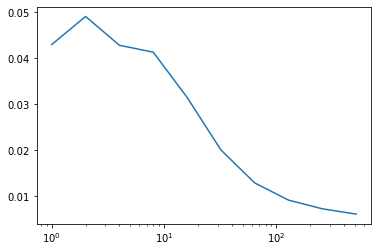

In [37]:
import matplotlib.pyplot as plt
plt.plot(ks, ts)
plt.xscale('log')

Modern CPUs do not access memory byte by byte. Instead, they fetch memory in chunks of (typically) 64 bytes, called cache lines. When you read a particular memory location, the entire cache line is fetched from the main memory into the cache. And, accessing other values from the same cache line is cheap!

Since 16 ints take up 64 bytes (one cache line), for-loops with a step between 1 and 16 have to touch the same number of cache lines: all of the cache lines in the array. But once the step is 32, we’ll only touch roughly every other cache line, and once it is 64, only every fourth.

More: http://igoro.com/archive/gallery-of-processor-cache-effects/

## More performance tips

https://shihchinw.github.io/2019/03/performance-tips-of-numpy-ndarray.html

## JIT

JIT = Just-In-Time compilation

In [38]:
import numpy as np
def matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]  
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
                
    return c

In [39]:
import numpy as np
from numba import jit

@jit(nopython=True)
def numba_matmul(a, b):
    n = a.shape[0]
    k = a.shape[1]
    m = b.shape[1]
    c = np.zeros((n, m))
    for i in range(n):
        for j in range(m):
            for s in range(k):
                c[i, j] += a[i, s] * b[s, j]
    return c

Let us compare computational times.

In [40]:
n = 100
a = np.random.randn(n, n)
b = np.random.randn(n, n)

%timeit -n 1 matmul(a, b)
%timeit -n 2 numba_matmul(a, b)
%timeit -n 4 np.dot(a, b)

392 ms ± 33.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
The slowest run took 162.76 times longer than the fastest. This could mean that an intermediate result is being cached.
23.4 ms ± 55 ms per loop (mean ± std. dev. of 7 runs, 2 loops each)
59.4 µs ± 19.2 µs per loop (mean ± std. dev. of 7 runs, 4 loops each)


## Enter JAX

JAX $\approx$ Just After eXecution

In [41]:
import jax.numpy as jnp
import numpy as np

In [42]:
size = (1000, 1000)
a = np.random.normal(size=size)

In [43]:
%timeit -n 10 np.sum(a**3)

17.5 ms ± 61 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [44]:
%timeit -n 10 np.sum(a*a*a)

1.55 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [45]:
a = jnp.asarray(a)

In [46]:
%timeit jnp.sum(a**3).block_until_ready()

544 µs ± 5.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Simply replacing numpy with jax.numpy, we got a 20x speed-up. 
jax.numpy can be even faster than pure C code due to very clever optimizations. We will discuss jax in more details in Lecture 7.
Meanwhile: https://github.com/google/jax/discussions/11078

# Part II: Vector and matrix norms. Orthogonal matrices.

# Vector and matrix norms. Orthonogal matrices. 

## Reading
- Trefethen NLA, Lectures 1 - 3
- Tyrtyshnikov, Lecture 1

## Notations

We use notation (for matrix of $m$ rows and $n$ columns) 

$$A= \begin{bmatrix} a_{11} & \dots & a_{1n} \\ \vdots & \ddots & \vdots \\ a_{m1} & \dots & a_{mn}  \end{bmatrix}.$$

## Matrix-vector multiplication 

Let matrix $A$ be composed from columns $a_i$: $A = \bigg[a_1\bigg|a_2\bigg|...\bigg|a_n\bigg]$ 

Then matrix-vector multiplication can be understood as follows:
$$
Ax = \bigg[a_1\bigg|a_2\bigg|...\bigg|a_n\bigg]x = x_1 \bigg[a_1\bigg] + x_2 \bigg[a_2\bigg] + ... + x_n \bigg[a_n\bigg],
$$
that is column vector $b=Ax$ is a linear combination of columns of $A$.

## Matrix-vector multiplication: complexity

Multiplication of an $n\times n$ matrix $A$ by a vector $x$ of size $n\times 1$ ($y=Ax$):

$$
y_{i} = \sum_{i=1}^n a_{ij} x_j
$$

requires $n^2$ mutliplications and $n(n-1)$ additions. Thus, the overall complexity is $\mathcal{O}(n^2)$ 

## Matrix-matrix product
A product of an $n \times k$ matrix $A$ and a $k \times m$ matrix $B$ is a $n \times m$ matrix $C$ with the elements  
$$
   c_{ij} = \sum_{s=1}^k a_{is} b_{sj}, \quad i = 1, \ldots, n, \quad j = 1, \ldots, m 
$$
For $m=k=n$ complexity of a naive algorithm is $\mathcal{O}(n^3)$. 

The rather elementary https://en.wikipedia.org/wiki/Strassen_algorithm allows to achieve $\approx O(N^{2.81})$. Theoretically even faster algorithms (the best is $\mathcal{O}(n^{2.37})$) exist, see a popular article https://www.quantamagazine.org/mathematicians-inch-closer-to-matrix-multiplication-goal-20210323/


## Range and nullspace 

- range(A) is the set of vectors, which can be expressed as $Ax$
- range(A) is the space spanned by the columns of $A$
- null(A) is the set of $x$ such that $Ax=0$

## Column and row rank 

- column rank is dimension of the column space
- row rank is dimension of the row space
- column rank is always equal to row rank

## Full rank matrix and inverse

- The highest rank for a $m\times n$ matrix is $\min(m, n)$
- The $m\times n$ matrix of a rank $\min(m, n)$ is called full rank matrix
- Square $m\times m$ matrix of a full rank is called non-singular matrix
- Non-singular matrix has an inverse $A^{-1}$ such that $A A^{-1} = A^{-1} A = 1$

## Inverse matrix times a vector 

Geometric interpretation: Consider $x=A^{-1}b$. Its equivalent to $b=Ax$, hence $x$ is a vector of coefficients of expansion of $b$ over columns of $A$.
In practice, if your algorithm needs to compute a matrix inverse, you are probably doing it wrong (for example, applying inverse of a matrix to a vector is better implemented as solution of the linear system).

# Vector norm

- The notions of size and distance in vector space are captured by norms 

- Norm is a measure of magnitude of a vector, denoted as $\Vert x \Vert$.

The norm should satisfy certain properties:

- $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
- $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (triangle inequality)
- If $\Vert x \Vert = 0$ then $x = 0$

The distance between two vectors is then defined as

$$ d(x, y) = \Vert x - y \Vert. $$

The most well-known and widely used norm is euclidean norm:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

## $p$-norm
Euclidean norm, or $2$-norm, is a subclass of an important class of $p$-norms:

$$ \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}. $$

## Equivalence of the norms
All norms are equivalent in the sense that

$$ C_1 \Vert x \Vert_* \leq  \Vert x \Vert_{**} \leq C_2 \Vert x \Vert_* $$  

for some positive constants $C_1(n), C_2(n)$, $x \in \mathbb{R}^n$ for any pairs of norms $\Vert \cdot \Vert_*$ and $\Vert \cdot \Vert_{**}$. The equivalence of the norms means that if the vector is small in one norm, it is small in another norm. However, the constants can be large.

## Computing norms in Python

In [47]:
import numpy as np
n = 100
a = np.ones(n)
b = a + 1e-3 * np.random.randn(n)
print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in L_{inf} norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0007970883810244821
Relative error in L2 norm: 0.001010323277420861
Relative error in L_{inf} norm: 0.0033282301825079508


## Why $L_1$-norm can be important?

$L_1$ norm has sparsifying property. Consider underdetermined system of equations:

$$Ax = f,$$ where $A$ is an $n \times m$ matrix, $A$ is known and $n\ll m$.

The question: can we find the solution $x$?

Solution is not unique; a natural approach is to find the solution that is 'minimal' in some sense:

\begin{align*}
& \Vert x \Vert \rightarrow \min_x \mbox{ subject to } Ax = f
\end{align*}

- Typical choice of $\Vert x \Vert = \Vert x \Vert_2$ leads to the solution vector of a minimal length  

- The choice $\Vert x \Vert = \Vert x \Vert_1$ typically yields the most sparse solution vector

## Matrix norms
$\Vert \cdot \Vert$ is called a matrix norm if it is a vector norm on the vector space of $m \times n$ matrices:
1. $|A| \geq 0$ and if $|A| = 0$ then $A = 0$
2. $|\alpha A| = |\alpha| |A|$
3. $|A+B| \leq |A| + |B|$ (triangle inequality)

### Example: Frobenius norm

$$
\|A\|_{\text{F}}={\sqrt {\sum _{i=1}^{m}\sum _{j=1}^{n}|a_{ij}|^{2}}}={\sqrt {\operatorname {trace} \left(A^{*}A\right)}}
$$

## Induced norms

- The most important class of the matrix norms is the class of induced norms. They are defined as

$$ \Vert A \Vert_{*} = \sup_{x \ne 0} \frac{\Vert A x \Vert_*}{\Vert x \Vert_*}, $$

where $\Vert \cdot \Vert_*$ is a certain vector norm.

- Frobenius norm is a matrix norm, but not an induced norm, i.e. you can not find $\Vert \cdot \Vert_*$ which induces it.

## Induced $p$-norms

Important case of operator norms are matrix $p$-norms, which are defined for $\|\cdot\|_* = \|\cdot\|_p$. <br>

Among all $p$-norms three norms are the most common ones:  

- $p = 1, \quad \Vert A \Vert_{1} = \displaystyle{\max_j \sum_{i=1}^n} |a_{ij}|$.

- $p = 2, \quad$ spectral norm, denoted by $\Vert A \Vert_2$.

- $p = \infty, \quad \Vert A \Vert_{\infty} = \displaystyle{\max_i \sum_{j=1}^m} |a_{ij}|$.

## Spectral norm

- Spectral norm, $\Vert A \Vert_2$ is one of the most used matrix norms (along with the Frobenius norm). 
- It can not be computed directly from the entries using a simple formula, like the Frobenius norm, however, there are efficient algorithms to compute it.  
- It is directly related to the singular value decomposition (SVD) of the matrix (next lectures).

# Orthogonal vectors and matrices 

- A pair of vectors $x$ and $y$ is orthogonal if $x^*y=0$
- A set of non-zero vectors is orthogonal if its elements are pairwise orthogonal
- A set of non-zero vectors is orthonormal if it is orthogonal and all vectors have unit length $x^* x = 1$

- A square complex matrix $Q$ is called unitary (orthogonal in real case) if $Q^* Q = 1$ 
- In terms of columns: $q_i^*q_j=\delta_{ij}$ and the columns of $Q$ form an orthonormal basis
- Unitary matrices preserve vector length:
$$
||Qx||_2 = ||x||_2
$$

- For rectangular matrices of size $m\times n$ ($n\not= m$) only one of the equalities can hold

    - $ Q^*Q = I_n$ – left unitary for $m>n$
    - $ QQ^* = I_m$  – right unitary for $m<n$

- In the case of real matrices $Q^* = Q^T$ and matrices such that

$$ Q^TQ = QQ^T = I $$

are called orthogonal.

Important property: a product of two unitary matrices is a unitary matrix:  

$$(UV)^* UV = V^* (U^* U) V = V^* V = I,$$

## Unitary invariance of $\|\cdot\|_2$ and $\|\cdot\|_F$ norms

- For vector 2-norm we have already discussed that $\Vert U z \Vert_2 = \Vert z \Vert_2$ for any unitary $U$.

- One can show that unitary matrices also do not change matrix norms $\|\cdot\|_2$ and $\|\cdot\|_F$, i.e. for any square $A$ and unitary $U$,$V$: 

$$ \| UAV\|_2 = \| A \|_2 \qquad \| UAV\|_F = \| A \|_F.$$